In [1]:
! pip install scikit-learn
! pip install tensorflow
! pip install pandas
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle

In [3]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
## Encoding Categorical Variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])

In [6]:
## One HotEncoding on the Geography location names
one_hot_encoder_geo=OneHotEncoder()
geo=one_hot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
one_hot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
data.drop(['Geography'],axis=1,inplace=True)
data = pd.concat([data, pd.DataFrame(geo,columns=one_hot_encoder_geo.get_feature_names_out(['Geography']))], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [9]:
with open('label_encoder_gender.pkl','wb')as file:
    pickle.dump(label_encoder_gender,file)
with open('one_hot_encoder_geo.pkl','wb') as file:
          pickle.dump(one_hot_encoder_geo,file)

### Train Test Split


In [10]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## ANN Implimentation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [12]:
## Build our ANN model
model=Sequential(
    [
        Dense(64,activation='relu',input_shape=(x_train.shape[1],)), ## HL1
        ## input_shape tells Keras how many features each sample has so it can initialize weights correctly.
        ## Without it, Keras doesn’t know how big the first weight matrix should be.
        
        Dense(32,activation='relu') ##HL 2
        ## input shape is not needed here because it gets i/p from the prev layer
        ,Dense(1,activation='sigmoid') ## output layer     
    ]
)


## So basically we have created a model with 3 layers(2 Hidden layers and 1 output layer)+1 input layer
## in the HL1 there are 64 hidden neurons
## in the HL2 there are 32 hidden neurons
## in the output layer there is only 1 hidden neuron

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
## Compile the model


In [15]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
## If it was a multiclass classification then we would have used 'categorical_crossentropy'
## If it was a binary classification then we would have used 'binary_crossentropy'
## If it was a regression then we would have used 'mean_squared_error'

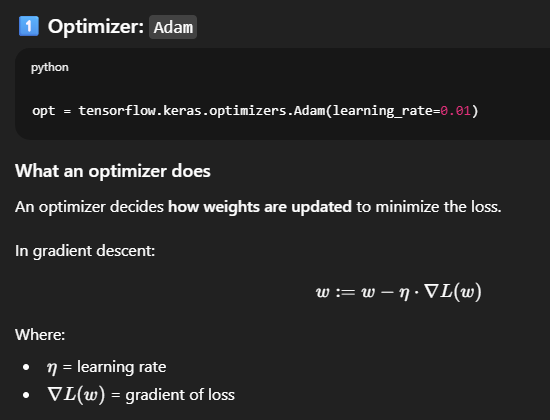
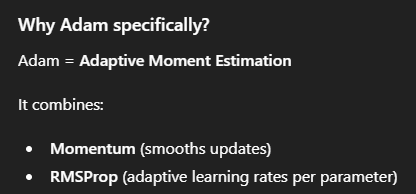
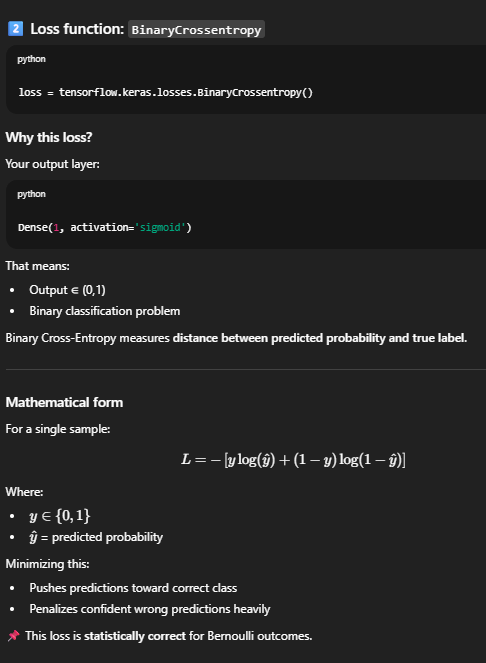
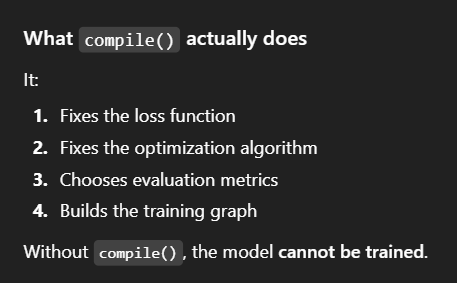
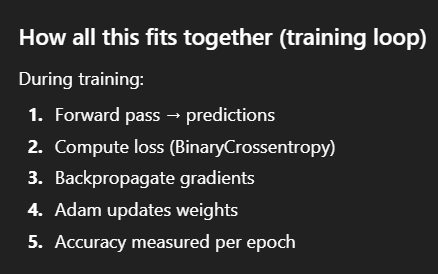

## This part below is not compulsory

In [16]:
## Set up the tensorboard

In [17]:
log_dir='logs/fit'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [18]:
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)
early_stopping_callbacks=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[tensorflow_callback,early_stopping_callbacks])

Epoch 1/100


250/250 [==============================] - 3s 5ms/step - loss: 0.3959 - accuracy: 0.8347 - val_loss: 0.3497 - val_accuracy: 0.8585
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8543 - val_loss: 0.3577 - val_accuracy: 0.8595
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8514 - val_loss: 0.3492 - val_accuracy: 0.8550
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8600 - val_loss: 0.3552 - val_accuracy: 0.8625
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8591 - val_loss: 0.3449 - val_accuracy: 0.8650
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8614 - val_loss: 0.3586 - val_accuracy: 0.8365
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8634 - val_loss: 0.3468 - val_accuracy: 0.86

In [20]:
history.history


{'loss': [0.39591628313064575,
  0.35962992906570435,
  0.35193678736686707,
  0.3418516218662262,
  0.3417763113975525,
  0.3362894356250763,
  0.3362404704093933,
  0.3376743495464325,
  0.3348552882671356,
  0.32884371280670166,
  0.329314649105072,
  0.32591772079467773,
  0.3236214518547058,
  0.320612370967865,
  0.32313522696495056,
  0.31940507888793945,
  0.3156762421131134,
  0.31710729002952576,
  0.3115988075733185,
  0.31212344765663147,
  0.3046284317970276,
  0.30603066086769104,
  0.3036343455314636],
 'accuracy': [0.8347499966621399,
  0.8542500138282776,
  0.8513749837875366,
  0.8600000143051147,
  0.859125018119812,
  0.8613749742507935,
  0.8633750081062317,
  0.8632500171661377,
  0.862500011920929,
  0.8648750185966492,
  0.8656250238418579,
  0.8658750057220459,
  0.8690000176429749,
  0.8684999942779541,
  0.8690000176429749,
  0.8705000281333923,
  0.8684999942779541,
  0.8723750114440918,
  0.8722500205039978,
  0.8731250166893005,
  0.8756250143051147,
  0.8

In [21]:
model.save('model.h5')

C:\Users\KIIT0001\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 31696), started 4:11:35 ago. (Use '!kill 31696' to kill it.)

: 